In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


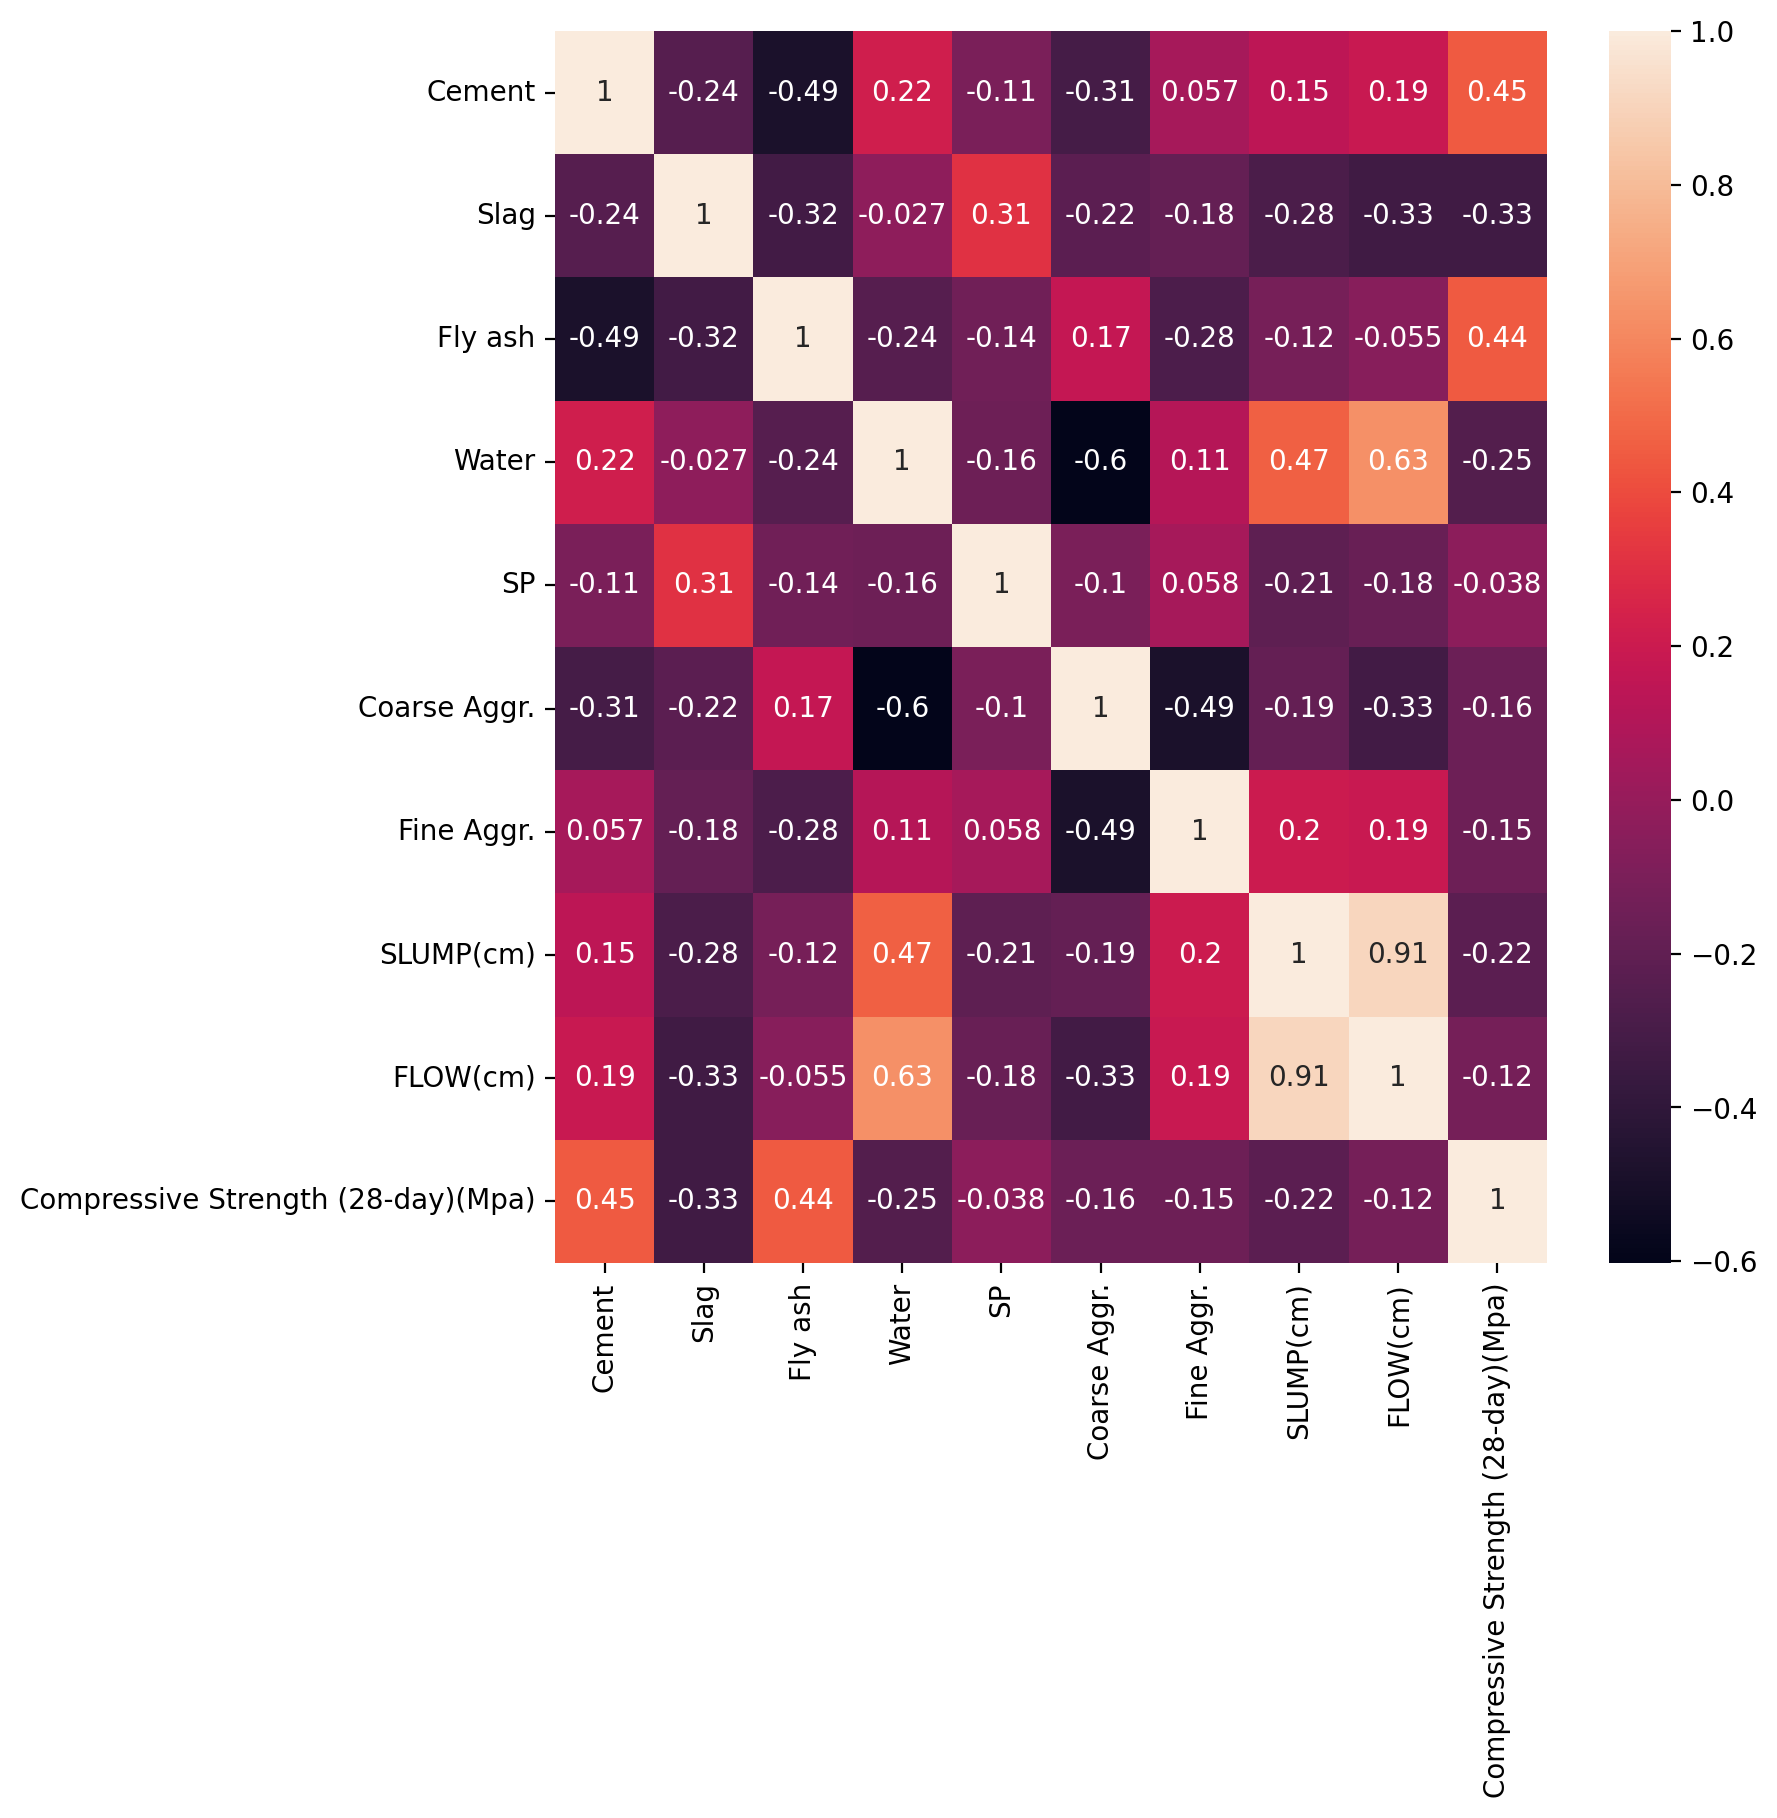

In [12]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#базовая модель 
from sklearn.svm import SVR, LinearSVR
base_model = SVR()
base_model.fit(X_train, y_train)
base_preds = base_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, base_preds)}')
print(f'MSE: {mean_squared_error(y_test, base_preds)}')



MAE: 5.236902091259178
MSE: 44.83527552212948


In [18]:
#улучшенная модель
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01, 0.1, 0.5, 1], 
              'kernel':['linear', 'rbf', 'poly'], 
              'gamma':['scale', 'auto'], 
              'degree':[2,3,4],
              'epsilon' : [0, 0.01, 0.1, 0.5, 1, 2]}
grid = GridSearchCV(base_model, param_grid)
grid.fit(X_fit, y_f)
print(grid.best_params_)

NameError: name 'svm' is not defined